In [1]:
# import libraries
import pandas as pd # data processing
import numpy as np # linear algebra
import string

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [2]:
# Getting the data
train_df = pd.read_csv('../DataScience/titanic/train.csv')
test_df = pd.read_csv('../DataScience/titanic/test.csv')

In [3]:
# Data Exploration
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Training set has 891 rows and 11 features, including Survived column. so 10 features.
Age, Cabin,and Embarked has missing values.
Here are some details about the features:
survived:   Survival of the passenger (missing from test data set)
Pclass:  Ticket class
Name: Might be useful while filling up missing values of Age
Sex: gender
Age: in years
SibSp: # of siblings / spouses abroad 
Parch: # of parents / childern abroad
Ticket: Ticket number (might not be that useful)
Fare: Fare amount (Might be useful)
Cabin: Based on the location of the cabin, might be useful in determining survival. A lot of them are missing. We might need to use SibSp, Parch, Fare price to determine the missing values
Embarked: Port of Embarkation

In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


~38% survived.
Age ranges from 0.4 to 80
Fare ranges from 0 to 512 with mean around 32

In [5]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Data type needs to be changed to integer or float as most of the columns have non-numeric data type.
Data range needs to be normalized.
Figuring out ways to deal with missing data (NaN)
Let's see what data is actually missing

In [6]:
Missing_data_pct = train_df.isnull().sum()/len(train_df) * 100
Missing_data_pct

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

Only 3 columns are missing values. Embarked missing on 0.2%. Should be able to fix by correlating the fare and embark

What features could contribute for surviving?
1. Age and Sex
 
   Let's investigate it further, but let's try to figure out a way to find NaN values in Age column.
   

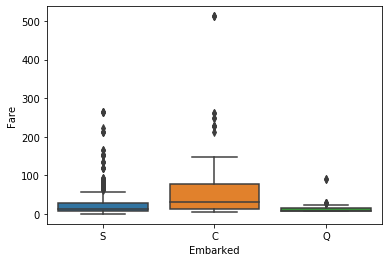

In [7]:
ax = sns.boxplot(x='Embarked',y='Fare',data=train_df)

In [8]:
boo1 = pd.isnull(train_df['Embarked'])
train_df[boo1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


As fare for the NaN rows in Embarked column is 80, which suggests most likely it is C.
Let's replace NaN with C

In [9]:
copy_train = train_df.copy()
copy_train['Embarked'].fillna('C',inplace=True)

In [10]:
copy_train.iloc[61]
copy_train.iloc[829]

PassengerId                                          830
Survived                                               1
Pclass                                                 1
Name           Stone, Mrs. George Nelson (Martha Evelyn)
Sex                                               female
Age                                                   62
SibSp                                                  0
Parch                                                  0
Ticket                                            113572
Fare                                                  80
Cabin                                                B28
Embarked                                               C
Name: 829, dtype: object

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


splitting the Name to get title info


In [13]:
Names = copy_train['Name']
Names.tail(6)

885        Rice, Mrs. William (Margaret Norton)
886                       Montvila, Rev. Juozas
887                Graham, Miss. Margaret Edith
888    Johnston, Miss. Catherine Helen "Carrie"
889                       Behr, Mr. Karl Howell
890                         Dooley, Mr. Patrick
Name: Name, dtype: object

Create a Title column, to get title from Name column
Once it is verified by Sex column, Name column can be dropped.

In [14]:
#del copy_train['Title']
sal=[]
for name in copy_train['Name']:
    [Last,first]= name.split(',')
    sal.append(first.split()[0])
len(sal)


891

In [15]:
copy_train['Title'] = sal
copy_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.


In [23]:
Uniq_title = copy_train['Title'].unique()
Uniq_title

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.',
       'Countess', 'Jonkheer.'], dtype=object)

Instead of Countess, it had the title 'the'. Let's check all the titles and make necessary changes.

In [ ]:
copy_train['Title']=copy_train['Title'].str.replace('the','Countess')


In [26]:
# Let's check each title in more detail

check_title = copy_train[copy_train['Title'] == 'Mlle.']

check_title.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
641,642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.3000,B35,C,Mlle.
710,711,1,1,"Mayne, Mlle. Berthe Antonine (""Mrs de Villiers"")",female,24.0,0,0,PC 17482,49.5042,C90,C,Mlle.


Let's divide the titles by Pclass 

In [36]:
# Let's get the frequency of titles
pd.crosstab(index=copy_train['Title'],columns='count')

col_0,count
Title,
Capt.,1
Col.,2
Countess,1
Don.,1
Dr.,7
Jonkheer.,1
Lady.,1
Major.,2
Master.,40


In [38]:
boo1 = pd.isnull(copy_train['Age'])
missing_age=copy_train[boo1]
missing_age.head()
pd.crosstab(index=missing_age['Title'],columns='count')

col_0,count
Title,
Dr.,1
Master.,4
Miss.,36
Mr.,119
Mrs.,17
